# **단변량분석_범주형변수**

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

## **1.환경준비**

### **(1) 라이브러리 불러오기**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩**

#### **1) titanic**
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


#### **2) New York Air Quality**

* url : https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date : 연,월,일

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **2.범주형 변수**

### **(1) 수치화 : 기초통계량**

* 범주형 변수는 범주별 빈도수와 비율을 확인합니다.
* 리스트.count(‘값’)
    * 해당 값이 몇 개 있는지 count 해 줍니다.
    * Count를 전체 개수(len(gender))로 나눠주면 비율이 됩니다.
    * 그런데, 범주가 두 세 개 정도면, 이렇게 계산하는 게 가능합니다.
    * 만약 범주가 10개라면?


#### **1) 범주별 빈도수**
* .value_counts() : 범주의 개수와 상관 없이 범주 별 개수를 count 해 줍니다.

In [6]:
titanic['Embarked'].value_counts()

Embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

#### **2) 범주별 비율**
* .value_counts(normalize = True)

In [7]:
titanic['Embarked'].value_counts(normalize = True)

Embarked
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

* titanic['Pclass’] 해석
    * .value_counts()를 이용하여 범주별 빈도수와 범주별 비율을 구할수 있습니다.
    * 3등급 객실 탑승객이 전체에서 55%를 차지합니다.
    * 1등급 객실이 24%, 2등급 객실이 20.7 %



<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] titanic의 Pclass에 대한 기초 통계량을 구하시오.

In [12]:
display(titanic[['Pclass']].value_counts())
titanic['Pclass'].value_counts(normalize=True)

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

[문2] titanic의 Survived에 대한 기초 통계량을 구하시오.

In [13]:
display(titanic['Survived'].value_counts())
titanic['Survived'].value_counts(normalize=True)

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### **(2) 시각화**

#### **1) bar chart**

* seaborn의 countplot
    * plt.bar() 를 이용하려면 먼저 집계한 후 결과를 가지고 그래프를 그려야 합니다.
    * countplot은 집계 + bar plot을 한꺼번에 해결해줍니다!

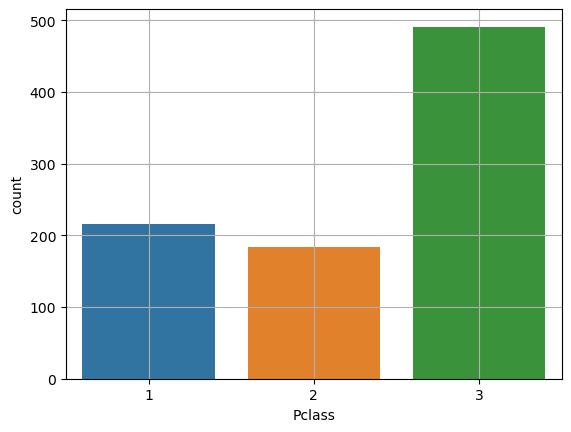

In [14]:
sns.countplot(x = 'Pclass', data = titanic)
plt.grid()
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] titanic의 Embarked에 대한 bar chart를 그리시오.

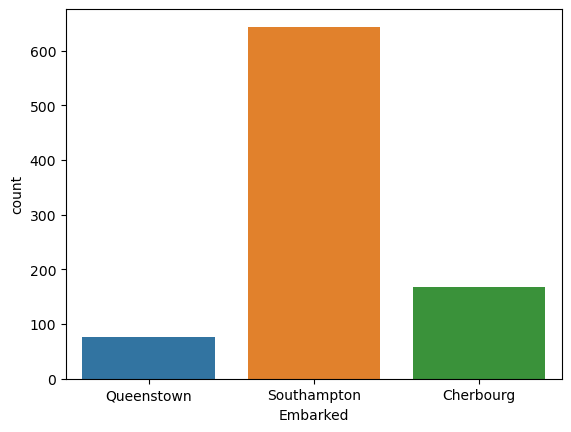

In [24]:
sns.countplot(x='Embarked', data=titanic, order=['Queenstown','Southampton','Cherbourg'])
plt.show()

#### **2) (추가) pie chart**

* 범주별 비율 비교할 때 파이차트 사용.
* 역시 먼저 집계를 해야 합니다.
* plt.pie( 값, labels=범주이름, autopct = ‘%.2f%%’)
    * autopct = ‘%**.2f%**%’ : 그래프에 표시할 값 비율 값에 대한 설정입니다.
        * **.2f%** : 소수점 두 자리 퍼센트로 표기 한다는 의미.


* pie chart 기본

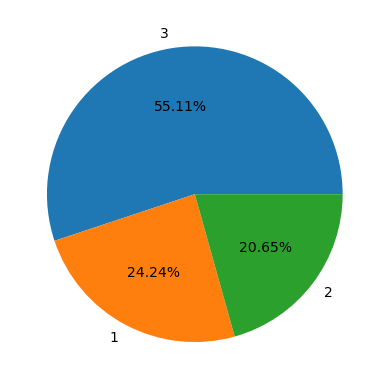

In [25]:
temp = titanic['Pclass'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

* pie chart 꾸미기 1

    * 각도와 방향 조정
        * startangle = 90 : 90도 부터 시작
        * counterclock = False : 시계 방향으로

In [ ]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle=90, counterclock=False)
plt.show()

* pie chart 꾸미기 2

    * 간격 띄우고, 그림자 넣기
        * explode = [0.05, 0.05,0.05] : 중심으로 부터 1,2,3 을 얼마만큼 띄울지
        * shadow = True : 그림자 추가



In [ ]:
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle=90, counterclock=False,
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

## **3.복습문제**

### **(1) 환경준비**
* 라이브러리 불러오기

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

* **변수설명**
> * **medv**  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== **Target**
> * **crim** :	범죄율
> * **zn** :	25,000 평방피트를 초과 거주지역 비율
> * **indus** :	비소매상업지역 면적 비율
> * **chas** :	찰스강변 위치(범주 : 강변1, 아니면 0)
> * **nox** :	일산화질소 농도
> * **rm** :	주택당 방 수
> * **age** :	1940년 이전에 건축된 주택의 비율
> * **dis** :	직업센터의 거리
> * **rad** :	방사형 고속도로까지의 거리
> * **tax** :	재산세율
> * **ptratio** :	학생/교사 비율
> * **lstat** :	인구 중 하위 계층 비율


In [27]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### **(2) 단변량 분석**

* chas(찰스강변 여부)

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [29]:
# Embarked 범주별 비율 확인
data['Embarked'].value_counts(normalize=True)

Embarked
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

In [32]:
data = data[data['Embarked'].notnull()]
data['Embarked'].value_counts(normalize=True)

Embarked
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64